In [1]:
!pip install xgboost

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Edu bridge\EDU\DATA\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y = df['Outcome']
x = df.drop(['Outcome'], axis=1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.3, random_state=1)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
model_tree = DecisionTreeClassifier()

In [13]:
model_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
model_tree.score(x_train, y_train)

1.0

In [15]:
model_tree.score(x_test, y_test)

0.6926406926406926

In [16]:
import xgboost as xgb

In [17]:
model_xgb = xgb.XGBClassifier()

In [18]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [19]:
model_xgb.score(x_test, y_test)

0.7705627705627706

In [20]:
model_predict = model_xgb.predict(x_test)

In [21]:
model_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test, model_predict)

0.7705627705627706

In [24]:
from xgboost import XGBClassifier

In [25]:
p = {'objective':'binary:logistic',
    'max_depth':4,
    'alpha':10,
    'learning_rate':1,
    'n_estimators':100}

In [26]:
xgb_model = XGBClassifier(**p)

In [27]:
xgb_model.fit(x_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=4,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

In [28]:
xgb_predict = xgb_model.predict(x_test)

In [29]:
accuracy_score(y_test,xgb_predict)

0.7922077922077922

In [32]:
from xgboost import cv

In [34]:
a = {'objective':'binary:logistic',
    'max_depth':5,
    'alpha':10,
    'learning_rate':0.1,
    'colsample_bytree':0.3}

In [35]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [36]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [37]:
data_m = xgb.DMatrix(data = x, label=y)

In [38]:
data_m

In [39]:
xgb_cv = cv(dtrain=data_m, params = a, nfold = 3, num_boost_round=50, early_stopping_rounds=10, metrics='auc', as_pandas=True, 
           seed=12)

In [40]:
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.601327,0.025472,0.549282,0.035389
1,0.681960,0.029509,0.609871,0.056862
2,0.714887,0.049285,0.655910,0.066203
3,0.755351,0.061161,0.697175,0.074296
4,0.782145,0.049369,0.731635,0.073792
5,0.818791,0.030005,0.776257,0.039311
6,0.827397,0.028728,0.780389,0.041488
7,0.829152,0.030824,0.782764,0.034131
8,0.827205,0.032126,0.779811,0.041106
9,0.838819,0.015868,0.792341,0.045377


In [41]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.601327,0.025472,0.549282,0.035389
1,0.681960,0.029509,0.609871,0.056862
2,0.714887,0.049285,0.655910,0.066203
3,0.755351,0.061161,0.697175,0.074296
4,0.782145,0.049369,0.731635,0.073792


<function matplotlib.pyplot.show(close=None, block=None)>

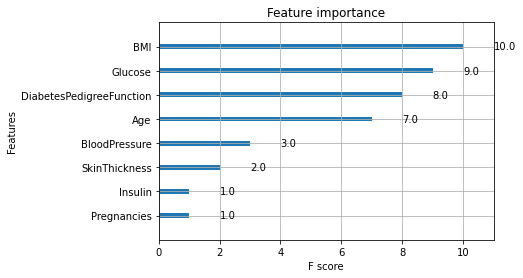

In [46]:
xgb.plot_importance(xgb_model)
plt.rcParams['figure.figsize']=[6,4]
plt.show